In [22]:
# Data handling
import pandas as pd
import numpy as np
import sys
from pathlib import Path

# Add repo root to sys.path
repo_root = Path().resolve().parent
sys.path.append(str(repo_root))

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

from src.dataprep.data_loader import load_housing_data
from src.dataprep.preprocessing import create_preprocessor

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.linear_model import Ridge

In [16]:
data_path = repo_root / "data" / "housing_dataset.csv"
df = load_housing_data(path=data_path)

In [17]:
X = df.drop("price", axis=1)
y = df["price"]

In [18]:
preprocessor = create_preprocessor(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
ridge_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", Ridge())
])

ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [23]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.4f}")
    return y_pred

def plot_predictions(y_test, y_pred, title="Predicted vs Actual"):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(title)
    plt.show()

def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8,6))
    sns.histplot(residuals, kde=True, color='green')
    plt.title("Residuals Distribution")
    plt.xlabel("Residuals")
    plt.show()

MSE: 1756731438876.36
R²: 0.6524


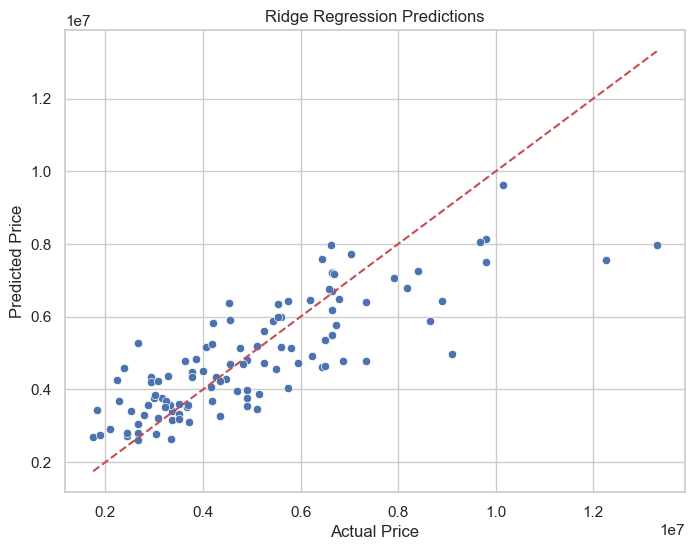

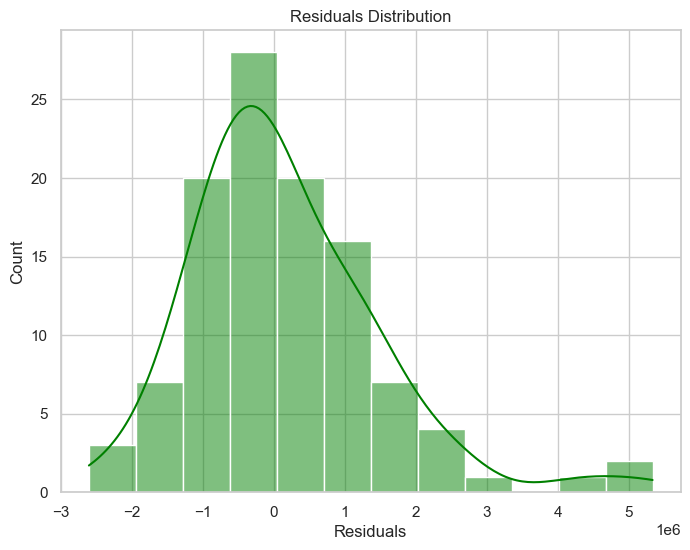

In [24]:
y_pred = evaluate_model(ridge_model, X_test, y_test)
plot_predictions(y_test, y_pred, "Ridge Regression Predictions")
plot_residuals(y_test, y_pred)

In [25]:
def hyperparameter_tuning(model, param_grid, X_train, y_train, cv=5, scoring="r2"):
    grid = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Best params:", grid.best_params_)
    return grid.best_estimator_

In [26]:
param_grid = {
    "regressor__alpha": [0.01, 0.1, 1.0, 10.0, 50.0],  # regularization strength
    "regressor__fit_intercept": [True, False]
}

In [27]:
best_ridge_model = hyperparameter_tuning(ridge_model, param_grid, X_train, y_train)

Best params: {'regressor__alpha': 10.0, 'regressor__fit_intercept': True}


MSE: 1777303012708.85
R²: 0.6484


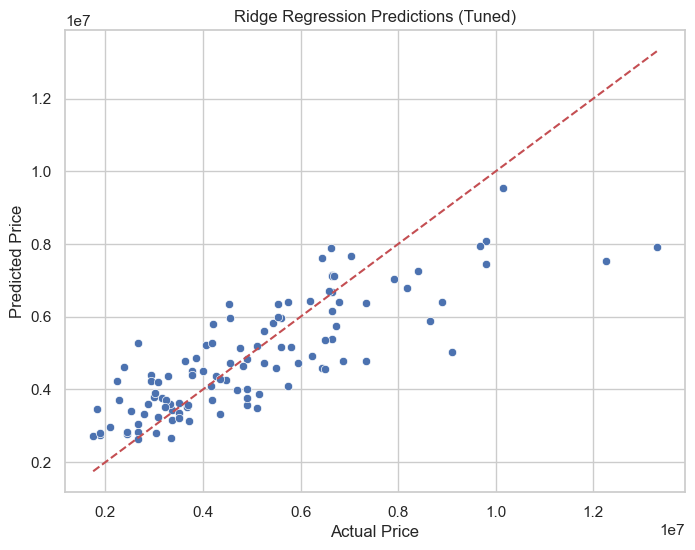

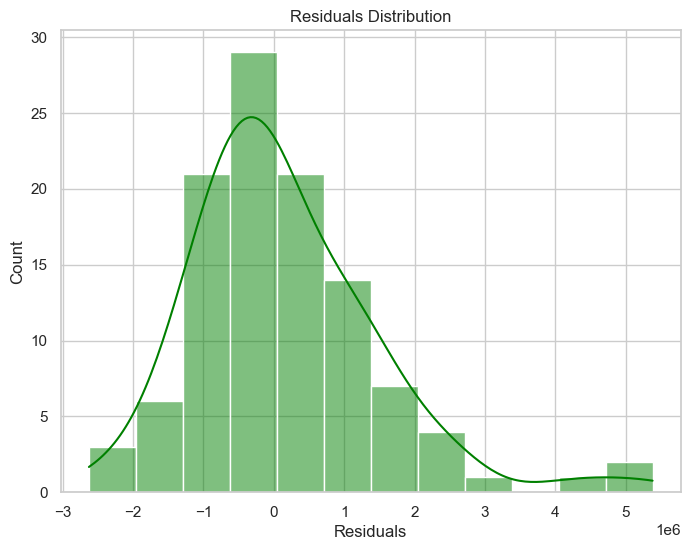

In [28]:
# Evaluate tuned model
y_pred_best = evaluate_model(best_ridge_model, X_test, y_test)
plot_predictions(y_test, y_pred_best, "Ridge Regression Predictions (Tuned)")
plot_residuals(y_test, y_pred_best)

---